# Criando Nomes

In [1]:
import pandas as pd
import html5lib

In [2]:
nomes_m = pd.read_json("https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=200&sexo=m")
nomes_f = pd.read_json("https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=200&sexo=f")

In [3]:
nomes_m.head()

,nome,regiao,freq,rank,sexo
0,JOSE,0,5732508,1,M
1,JOAO,0,2971935,2,M
2,ANTONIO,0,2567494,3,M
3,FRANCISCO,0,1765197,4,M
4,CARLOS,0,1483121,5,M


In [4]:
nomes_f.head()

,nome,regiao,freq,rank,sexo
0,MARIA,0,11694738,1,F
1,ANA,0,3079729,2,F
2,FRANCISCA,0,721637,3,F
3,ANTONIA,0,588783,4,F
4,ADRIANA,0,565621,5,F


In [37]:
total_alunos = len(nomes_f) + len(nomes_m)
print(f"Quantidade total de nomes: {total_alunos}")

Quantidade total de nomes: 400


In [6]:
frames = [nomes_m, nomes_f]

In [7]:
frames

[          nome  regiao     freq  rank sexo
 0         JOSE       0  5732508     1    M
 1         JOAO       0  2971935     2    M
 2      ANTONIO       0  2567494     3    M
 3    FRANCISCO       0  1765197     4    M
 4       CARLOS       0  1483121     5    M
 ..         ...     ...      ...   ...  ...
 195     WALTER       0    67207   196    M
 196    ARLINDO       0    66669   197    M
 197    MICHAEL       0    65736   198    M
 198     ALVARO       0    65444   199    M
 199    GEOVANE       0    65435   200    M
 
 [200 rows x 5 columns],
           nome  regiao      freq  rank sexo
 0        MARIA       0  11694738     1    F
 1          ANA       0   3079729     2    F
 2    FRANCISCA       0    721637     3    F
 3      ANTONIA       0    588783     4    F
 4      ADRIANA       0    565621     5    F
 ..         ...     ...       ...   ...  ...
 195     ROSANE       0     82203   196    F
 196    IVONETE       0     81878   197    F
 197    LUCIANE       0     81230   198 

In [8]:
nomes = pd.concat(frames)["nome"].to_frame()
nomes

,nome
0,JOSE
1,JOAO
2,ANTONIO
3,FRANCISCO
4,CARLOS
...,...
195,ROSANE
196,IVONETE
197,LUCIANE
198,ISADORA


In [9]:
nomes.sample(5)

,nome
75,MARLI
70,ISABELA
166,MICHEL
153,CAUA
33,NATALIA


# Incluindo ID dos alunos

In [10]:
import numpy as np

np.random.seed(42)

In [11]:
nomes["id"] = np.random.permutation(len(nomes)) + 1
nomes.sample(5)

,nome,id
85,HELENA,342
39,VITOR,142
11,CAMILA,113
199,GEOVANE,303
35,CARLA,358


In [12]:
dominios = ["@seudominio.com", "@dominando.com.br", "@apenasumdominio.com"]
nomes['dominio'] = np.random.choice(dominios, len(nomes))

In [13]:
nomes.sample(5)

,nome,id,dominio
0,JOSE,210,@apenasumdominio.com
197,MICHAEL,355,@apenasumdominio.com
103,KATIA,139,@apenasumdominio.com
27,GUILHERME,226,@dominando.com.br
95,ANDREA,357,@seudominio.com


In [14]:
nomes["email"] = nomes["nome"].str.cat(nomes["dominio"]).str.lower()

In [15]:
nomes.sample(5)

,nome,id,dominio,email
102,MARILENE,371,@apenasumdominio.com,marilene@apenasumdominio.com
181,YURI,145,@seudominio.com,yuri@seudominio.com
86,CRISTINA,214,@dominando.com.br,cristina@dominando.com.br
185,SHEILA,360,@dominando.com.br,sheila@dominando.com.br
29,TIAGO,105,@seudominio.com,tiago@seudominio.com


In [16]:
url = "http://tabela-cursos.herokuapp.com/index.html"
cursos = pd.read_html(url)

In [17]:
cursos

[                          Nome do curso
 0                 Lógica de programação
 1                         Java para Web
 2                           C# para Web
 3                         Ruby on Rails
 4                      Cursos de Python
 5                         PHP com MySql
 6                         .NET para web
 7            Novas integrações com Java
 8                          TDD com Java
 9                   Código limpo com C#
 10  Preparatório para certificação Java
 11                      Hardware básico
 12                Persistência com .NET
 13                  Desenvolvendo jogos
 14                     Análise de dados
 15                   Estatística básica
 16                  Internet das coisas
 17                Programação funcional
 18                Boas práticas em Java
 19          Orientação objetos com Java]

In [18]:
type(cursos)

list

In [19]:
cursos = cursos[0]
type(cursos)

pandas.core.frame.DataFrame

In [20]:
cursos

,Nome do curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python
5,PHP com MySql
6,.NET para web
7,Novas integrações com Java
8,TDD com Java
9,Código limpo com C#


In [21]:
cursos = cursos.rename(columns={"Nome do curso": "nome_do_curso"})

In [22]:
cursos.head()

,nome_do_curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python


In [23]:
cursos["id"] = cursos.index + 1

In [24]:
cursos.head()

,nome_do_curso,id
0,Lógica de programação,1
1,Java para Web,2
2,C# para Web,3
3,Ruby on Rails,4
4,Cursos de Python,5


In [25]:
cursos = cursos.set_index("id")

In [26]:
cursos.head()

,nome_do_curso
id,
1,Lógica de programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python


In [42]:
nomes["matriculas"] = np.ceil(np.random.exponential(size=total_alunos)
                              * 1.5).astype(int)

In [43]:
nomes.head()

,nome,id,dominio,email,matriculas
0,JOSE,210,@apenasumdominio.com,jose@apenasumdominio.com,2
1,JOAO,281,@apenasumdominio.com,joao@apenasumdominio.com,2
2,ANTONIO,34,@apenasumdominio.com,antonio@apenasumdominio.com,2
3,FRANCISCO,211,@apenasumdominio.com,francisco@apenasumdominio.com,1
4,CARLOS,94,@seudominio.com,carlos@seudominio.com,1


In [44]:
nomes.matriculas.value_counts()

1     193
2     107
3      51
4      26
5       8
6       7
7       3
8       3
13      1
9       1
Name: matriculas, dtype: int64

In [45]:
nomes.matriculas.describe()

count    400.000000
mean       2.032500
std        1.488955
min        1.000000
25%        1.000000
50%        2.000000
75%        2.250000
max       13.000000
Name: matriculas, dtype: float64

In [46]:
import seaborn as sns

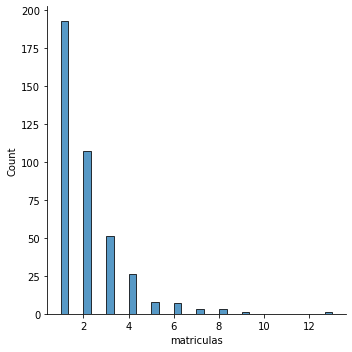

In [49]:
sns.displot(nomes.matriculas)

In [55]:
todas_matriculas = []
x = np.random.rand(20)
prop = x / sum(x)

In [63]:
for index, dados in nomes.iterrows():
    _id = dados["id"]
    num_mat = dados["matriculas"]
    for i in range(num_mat):
        mat = [_id, np.random.choice(cursos.index, p=prop)]
        todas_matriculas.append(mat)

In [69]:
matriculas = pd.DataFrame(todas_matriculas, columns=["id_aluno", 
                                                     "id_curso"])

In [70]:
matriculas.sample(10)

,id_aluno,id_curso
579,342,11
439,165,19
719,316,4
273,37,4
53,263,3
635,15,10
402,212,7
662,213,4
569,5,8
525,160,17


In [81]:
matriculas_por_curso = matriculas.groupby("id_curso").count().join(
    cursos["nome_do_curso"]).rename(columns={
    "id_aluno": "quantidade_de_alunos"})

In [82]:
nomes.matriculas.sum()

813

In [84]:
matriculas_por_curso["quantidade_de_alunos"].sum()

813